In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [6]:
# Add the python path to the folder containing some custom packages.
import sys
sys.path.insert(0, "../../packages/")
from TsIP.TsIP import TsIP

In [7]:
# Set default sizes for figures.
plt.style.use("default") # style matplotlib
plt.rc("axes", labelsize = 15) # fontsize of the x and y labels
plt.rc("axes", titlesize = 15) # fontsize of the axes title
plt.rc("xtick", labelsize = 15) # fontsize of the tick labels
plt.rc("ytick", labelsize = 15) # fontsize of the tick labels
plt.rc("legend", fontsize = 13) # legend fontsize

In [15]:
PROJECT_ROOT = "./RESULTS/2° Analysis"

# Forecasting

In [16]:
COUNTRY = "Yemen"

DIR_RESULTS = f"{PROJECT_ROOT}/{COUNTRY}/standard/out_test"
OUTPUT_FOLDER = f"{PROJECT_ROOT}/{COUNTRY}/standard/out_test/images"

if not os.path.exists(OUTPUT_FOLDER):
    os.makedirs(OUTPUT_FOLDER)

In [17]:
# Load forecasting results.
xls = pd.ExcelFile(DIR_RESULTS + "/forecast.xlsx")

forecast_splits = dict()
for i, split in enumerate(xls.sheet_names):
    if i == 0:
        df = pd.read_excel(xls, split, index_col = 0, header = [0, 1, 2])
    else:
        forecast_split = pd.read_excel(xls, split, index_col = 0, header = [0, 1, 2])
        forecast_split.drop("FCG", axis = 1, level = 2, inplace = True)
        forecast_split = pd.concat([df, forecast_split], axis = 1).sort_index(axis = 1, level = [0, 1, 2])
        # Save the predictions.
        forecast_splits[split] = forecast_split
    
forecast_splits = pd.concat(forecast_splits, axis = 1)
forecast_splits.columns.names = ["Split", "Country", "AdminStrata", "Prediction"]
forecast_splits.head()

Split          Split 1                                                      \
Country          Yemen                                                       
AdminStrata      Abyan                      Aden                  Al Bayda   
Prediction         FCG Forecast Naive        FCG Forecast Naive        FCG   
Datetime                                                                     
2018-07-02   31.158690      NaN   NaN  16.619519      NaN   NaN  38.332669   
2018-07-03   32.675222      NaN   NaN  16.370603      NaN   NaN  43.292084   
2018-07-04   33.415597      NaN   NaN  15.089163      NaN   NaN  45.128205   
2018-07-05   33.531451      NaN   NaN  15.766521      NaN   NaN  43.959297   
2018-07-06   33.951856      NaN   NaN  16.870065      NaN   NaN  44.516521   

Split                                  ... Split 13                            \
Country                                ...    Yemen                             
AdminStrata                Al Dhale'e  ...   Sa'ada     Sana'a                  
Prediction  Forecast Naive        FCG  ...    Naive        FCG Forecast Naive   
Datetime                               ...                                      
2018-07-02       NaN   NaN  29.194825  ...      NaN  26.917713      NaN   NaN   
2018-07-03       NaN   NaN  31.336940  ...      NaN  25.783476      NaN   NaN   
2018-07-04       NaN   NaN  33.135157  ...      NaN  25.436047      NaN   NaN   
2018-07-05       NaN   NaN  34.554309  ...      NaN  27.421759      NaN   NaN   
2018-07-06       NaN   NaN  33.878557  ...      NaN  26.547231      NaN   NaN   

Split                                                            
Country                                                          
AdminStrata    Shabwah                     Taizz                 
Prediction         FCG Forecast Naive        FCG Forecast Naive  
Datetime                                                         
2018-07-02   16.752289      NaN   NaN  26.563365      NaN   NaN  
2018-07-03   18.257453      NaN   NaN  29.124005      NaN   NaN  
2018-07-04   19.083081      NaN   NaN  29.427973      NaN   NaN  
2018-07-05   20.349533      NaN   NaN  30.456026      NaN   NaN  
2018-07-06   21.107524      NaN   NaN  31.012517      NaN   NaN  

[5 rows x 780 columns]

In [18]:
TsIP(forecast_splits).interactive_plot_df(title = "", matplotlib = False, style = "lines", comparison = False)

RadioButtons(description='Select:', options=('Time series', 'Missing values'), value='Time series')

Output()

In [19]:
def plot_prediction(df, split, country, province, ax):
    df = df[split][country][province]
    # Add the time-series to the figure.
    df.columns.name = None
    last_date = df["Forecast"].last_valid_index()
    df = df.loc[:last_date]
    for column in df.columns: 
        if column == "FCG":
            df[column].plot(ax = ax, label = "_", style = ":", c = "black", alpha = 0.5)
        elif column == "Naive":
            df[column].plot(ax = ax, label = "naive", style = "-", c = sns.color_palette("tab10")[0], legend = False)
        else:
            df[column].plot(ax = ax, label = "model", style = "-", c = sns.color_palette("tab10")[1], legend = False)
            
    # Set legend.
    ax.legend(title = df.columns.name, loc = "best")
    # Set axis names.
    ax.set_ylabel("")
    ax.set_xlabel("")
    ax.autoscale()

In [20]:
# Some example of predictions for visualization (paper).
REGIONS_PRED = {"Yemen": {0: ["Split 4", "Sana'a"], 1:["Split 4", "Al Jawf"]}, 
                "Syria": {0: ["Split 4", "Lattakia"], 1:["Split 5", "Damascus"]}, 
                "Mali": {0: ["Split 2", "Mopti"], 1:["Split 3", "Sikasso"]}, 
                "Nigeria": {0: ["Split 4", "Yobe"], 1:["Split 2", "Adamawa"]}, 
                "Cameroon": {0: ["Split 3", "Adamawa"], 1:["Split 2", "Central"]}, 
                "Burkina Faso": {0: ["Split 4", "Boucle-Du-Mouhoun"], 1:["Split 5", "Centre-Ouest"]}}

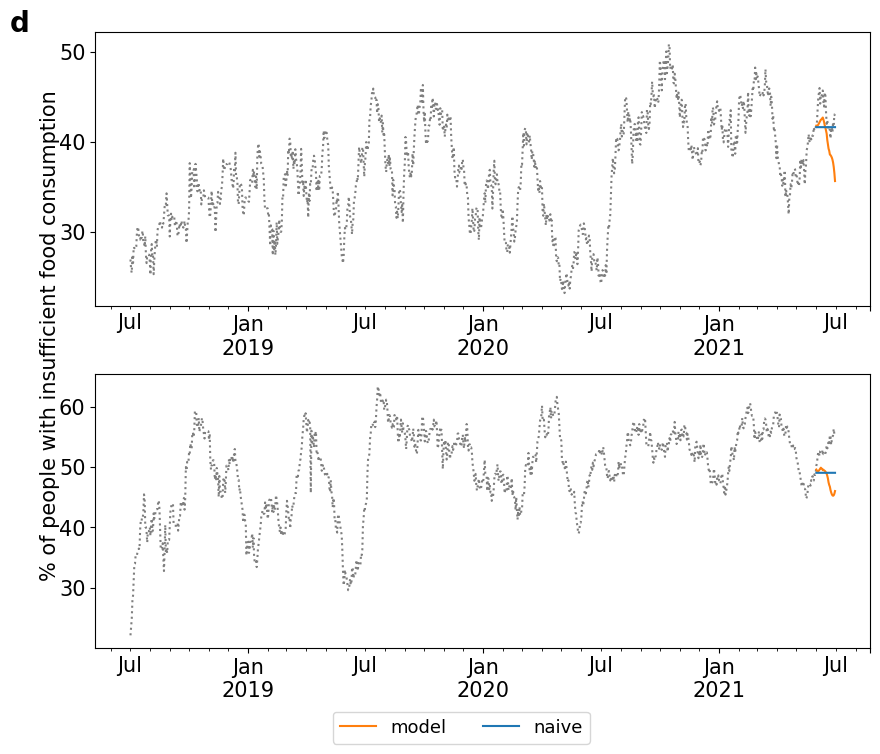

In [21]:
# Plot for paper.
fig, axs = plt.subplots(nrows = 2, ncols = 1, figsize = (10, 8))    
fig.subplots_adjust(hspace = .25)

plot_prediction(forecast_splits, REGIONS_PRED[COUNTRY][0][0], COUNTRY, REGIONS_PRED[COUNTRY][0][1], axs[0])
plot_prediction(forecast_splits, REGIONS_PRED[COUNTRY][1][0], COUNTRY, REGIONS_PRED[COUNTRY][1][1], axs[1])

fig.text(0.07, 0.5, "% of people with insufficient food consumption", va = "center", rotation = "vertical", 
         fontdict = {"size": 15})
axs.flatten()[0].get_legend().remove()
axs.flatten()[-1].legend(bbox_to_anchor = (0.65, -0.2), ncol = 2)

axs[0].text(-0.11, 1., "d", transform = axs[0].transAxes, 
            size = 20, weight='bold')

fig.savefig(OUTPUT_FOLDER + "/predictions.png", bbox_inches = "tight", dpi = 300)